# Imports

In [15]:
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

# First model

In [23]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [13]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [7]:
X_train.shape

(404, 13)

In [10]:
X_test.shape

(102, 13)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 34.3704 - mae: 4.1957 - val_loss: 26.5436 - val_mae: 3.7014
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 25.5939 - mae: 3.5449 - val_loss: 24.7475 - val_mae: 3.5518
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.5292 - mae: 3.4542 - val_loss: 38.9136 - val_mae: 4.6177
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29.3293 - mae: 3.7971 - val_loss: 37.1906 - val_mae: 4.5063
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 27.4709 - mae: 3.7154 - val_loss: 35.4535 - val_mae: 4.3671
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24.1825 - mae: 3.4156 - val_loss: 23.5273 - val_mae: 3.4240
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.1747 - mae: 3.3459 - val_loss: 27.0260 - val_mae: 3.8172
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30.7691 - mae: 4.1295 - val_loss: 22.8339 - val_mae: 3.3004
Epoch 9/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 27.1279 - mae: 3.6935
MAE sur test : 3.69


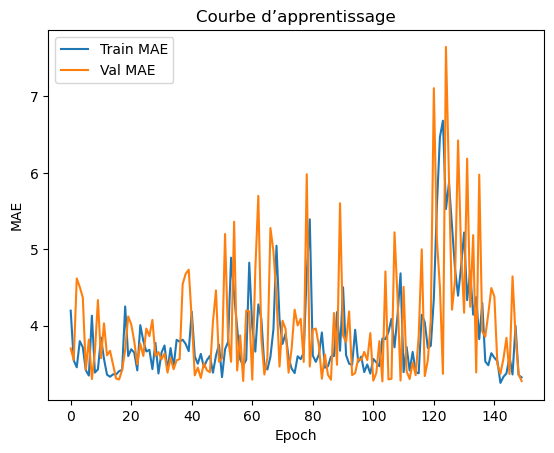

In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f"MAE sur test : {mae:.2f}")

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Courbe d’apprentissage')
plt.show()

# CNN

## CIFAR-10 Dataset

In [31]:
import tensorflow as tf 
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras import layers
from keras.utils import to_categorical

import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [3]:
print(type(X_train))
print(type(y_train))

print(type(X_test))
print(type(y_test))

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
X_train[0] #Array representation of an image 

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

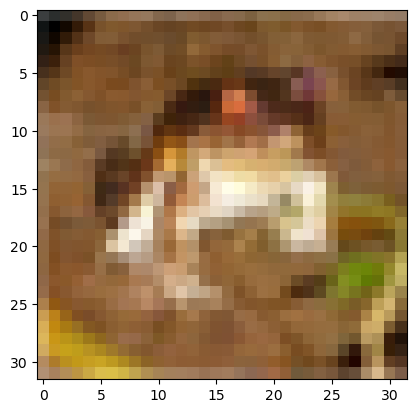

In [5]:
plt.imshow(X_train[0])

In [8]:
y_train[0]

array([6], dtype=uint8)

In [9]:
classification = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
classification[y_train[0][0]]

'frog'

In [10]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [11]:
y_train_one_hot[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [12]:
y_test_one_hot[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [13]:
X_train_norm = X_train.astype('float32')/255
X_test_norm = X_test.astype('float32')/255

In [16]:
#CNN model architecture 

model = Sequential()
model.add(Conv2D(32, (5,5), activation="relu", input_shape=(32,32,3))) #first convolution layer
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation="relu")) #second Convolution layer
model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.5)) 
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │       921,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 949,742 (3.62 MB)

 Trainable params: 949,742 (3.62 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
h = model.fit(X_train_norm,y_train_one_hot, epochs=10, 
              validation_split=0.2, batch_size=128)

Epoch 1/10


2025-10-29 16:06:04.458433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.1945 - loss: 2.2985 - val_accuracy: 0.3747 - val_loss: 1.7025
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.3093 - loss: 1.9463 - val_accuracy: 0.4035 - val_loss: 1.6160
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.3535 - loss: 1.7681 - val_accuracy: 0.4544 - val_loss: 1.4784
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.3832 - loss: 1.6982 - val_accuracy: 0.4628 - val_loss: 1.4850
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.3953 - loss: 1.6890 - val_accuracy: 0.4748 - val_loss: 1.4447
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.4078 - loss: 1.6931 - val_accuracy: 0.4961 - val_loss: 1.3888
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.4067 - loss: 1.7432 - val_accuracy: 0.4559 - val_loss: 1.5211
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.4105 - loss: 1.7843 - val_accuracy: 0.47

In [18]:
model.evaluate(X_test_norm, y_test_one_hot)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5242 - loss: 1.3845


0.5242000222206116

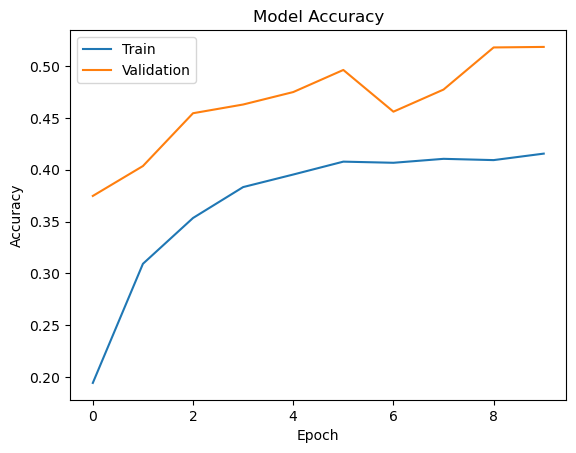

In [19]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## MNIST Dataset

In [20]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

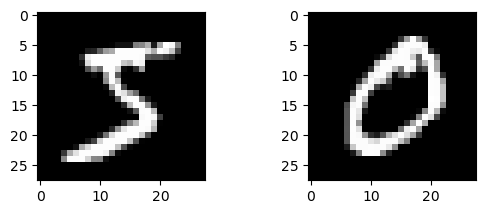

In [21]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap("gray"))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap("gray"))
plt.show()

In [23]:
y_train[0]

5

In [24]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [25]:
X_train_normalized = X_train.astype('float32')/255
X_test_normalized = X_test.astype('float32')/255

In [26]:
X_train_normalized[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [27]:
print(type(X_train))
print(type(y_train))

print(type(X_test))
print(type(y_test))

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [34]:
#CNN model architecture 

model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1))) #first convolution layer
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation="relu")) #second Convolution layer
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5)) 
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam", 
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,474 (494.04 KB)

 Trainable params: 126,282 (493.29 KB)

 Non-trainable params: 192 (768.00 B)

In [35]:
h = model.fit(X_train_normalized, y_train, epochs=10, 
              validation_split=0.2, batch_size=128)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.6638 - loss: 5.1177 - val_accuracy: 0.8456 - val_loss: 0.6688
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.8886 - loss: 1.5190 - val_accuracy: 0.9777 - val_loss: 0.2279
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9185 - loss: 0.9610 - val_accuracy: 0.9808 - val_loss: 0.2283
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9271 - loss: 0.7387 - val_accuracy: 0.9834 - val_loss: 0.1757
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9427 - loss: 0.4712 - val_accuracy: 0.9818 - val_loss: 0.1672
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9451 - loss: 0.3778 - val_accuracy: 0.9858 - val_loss: 0.1097
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9520 - loss: 0.2725 - val_accuracy: 0.9858 - val_loss: 0.0961
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9550 - loss: 0.2211 - val_acc

In [37]:
model.evaluate(X_test_normalized, y_test)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9882 - loss: 0.0581


0.9882000088691711

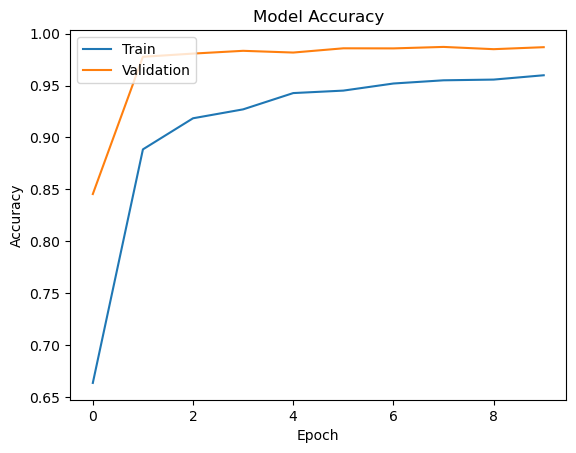

In [38]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()